<a href="https://colab.research.google.com/github/helkw/Quantum-Capacity/blob/master/1_n_coherent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
from scipy.stats import unitary_group

In [ ]:
!pip install qutip

     |████████████████████████████████| 3.4MB 5.5MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for qutip: filename=qutip-4.5.2-cp36-cp36m-linux_x86_64.whl size=12468022 sha256=b7898d13578b38392b2f3a7bc862046622bad114a00aa69439b401c403846a55
  Stored in directory: /root/.cache/pip/wheels/ae/90/e9/f26fdecfb6c0e9d9d6f5fa564d16d26ff2bdfd8ad6e7a8a28a
Successfully built qutip


In [ ]:
from qutip import *

In [ ]:
def sqrt(x):
  return math.sqrt(x)

In [ ]:
def psi_0(M, n):
  a = M[0][0]
  b = M[0][1]
  c = M[1][0]
  d = M[1][1]
  ret = np.zeros([n+1, n+1], dtype=np.complex)
  if n==2:
    ret= np.array(
        [[2*a, sqrt(2)*b, 0],
         [sqrt(2)*c, a+d, sqrt(2)*b],
         [0, sqrt(2)*c, 2*d]], dtype=np.complex)
  elif n==3:
    ret= np.array(
        [[3*a, sqrt(3)*b, 0, 0],
         [sqrt(3)*c, 2*a+d, sqrt(4)*b, 0],
         [0, sqrt(4)*c, a+2*d, sqrt(3)*b],
         [0, 0, sqrt(3)*c, 3*d]], dtype=np.complex)
  elif n==4:
    ret= np.array(
        [[4*a, sqrt(4)*b, 0, 0, 0],
         [sqrt(4)*c, 3*a+d, sqrt(6)*b, 0, 0],
         [0, sqrt(6)*c, 2*a+2*d, sqrt(6)*b, 0],
         [0, 0, sqrt(6)*c, a+3*d, sqrt(4)*b],
         [0, 0, 0, sqrt(4)*c, 4*d]], dtype=np.complex)
  return 2/(n*(n+1)) * ret
  

def psi_1(M, n):
  a = M[0][0]
  b = M[0][1]
  c = M[1][0]
  d = M[1][1]
  ret = np.zeros([n+1, n+1], dtype=np.complex)
  if n==2:
    ret= np.array(
        [[a+3*d, -sqrt(2)*b, 0],
         [-sqrt(2)*c, 2*a+2*d, -sqrt(2)*b],
         [0, -sqrt(2)*c, 3*a+d]], dtype=np.complex)
  elif n==3:
    ret= np.array(
        [[a+4*d, -sqrt(3)*b, 0, 0],
         [-sqrt(3)*c, 2*a+3*d, -sqrt(4)*b, 0],
         [0, -sqrt(4)*c, 3*a+2*d, -sqrt(3)*b],
         [0, 0, -sqrt(3)*c, 4*a+d]], dtype=np.complex)
  elif n==4:
      ret= np.array(
        [[a+5*d, -sqrt(4)*b, 0, 0, 0],
         [-sqrt(4)*c, 2*a+4*d, -sqrt(6)*b, 0, 0],
         [0, -sqrt(6)*c, 3*a+3*d, -sqrt(6)*b, 0],
         [0, 0, -sqrt(6)*c, 4*a+2*d, -sqrt(4)*b],
         [0, 0, 0, -sqrt(4)*c, 5*a+d]], dtype=np.complex)
  return 2/((n+1)*(n+2)) * ret

In [ ]:
def H(eig):
  ret = 0
  for i in range(eig.size):
    x = round(eig[i], 10)
    if x == 0: continue
    ret -= x * np.log(x)
  return ret

In [ ]:
def kraus_similar(n):
  if n==2:
    ret = np.array([[[0, 0], [1, 0], [0, sqrt(2)]],
                   [[-sqrt(2), 0], [0, -1], [0, 0]],
                   [[0, 0], [0, 0], [sqrt(3), 0]],
                   [[0, 0], [-sqrt(2), 0], [0, 1]],
                   [[1, 0], [0, -sqrt(2)], [0, 0]],
                   [[0, sqrt(3)], [0, 0], [0, 0]]], dtype = np.complex)
  #elif n==3:
  #elif n==4:
  
  return ret

def modified_kraus(a, b, n):
  kraus = kraus_similar(n)
  for i in range(2*n+2):
    if i < n: kraus[i] = sqrt(2/(2*3))*sqrt(a)*kraus[i]
    else: kraus[i] = sqrt(2/(3*4))*sqrt(b)*kraus[i]
  return kraus

In [ ]:
def phi(a, b, M, n):
  return a*psi_0(M, n) + b*psi_1(M, n)

def phi_c(a, b, M, n):
  kraus=modified_kraus(a, b, n)
  ret=np.zeros(shape=(2*n+2, 2*n+2), dtype=complex)
  for i in range(2*n+2):
    for j in range(2*n+2):
      ret[i][j]=np.trace(np.matmul(np.matmul(kraus[i], M), np.transpose(kraus[j])))
  return ret

In [ ]:
def one_shot(a, b, n, print_max_eig=False):
  max = -1
  max_eig=[]
  for epoch in range(10000):
    M = rand_dm(2).full()
    eig_phi = np.linalg.eigvalsh(phi(a, b, M, n)).real.round(10)
    eig_phi_c = np.linalg.eigvalsh(phi_c(a, b, M, n))
    result = H(eig_phi.real) - H(eig_phi_c.real)
    if result > max: 
      max = result
      max_eig = eig_phi
  if print_max_eig:
    print("a: {}, b: {}, max_eig: {}".format(a, b, max_eig))
    #if epoch%1000: print("a: {a}, b: {b}, epoch:{epoch} done".format(a=a, b=b, c=c, epoch=epoch))
  return max

In [ ]:
A=[]
B=[]
ONESHOT=[]

for i in range(0, 101, 1):
  a = i/100
  b = 1-a
  if b < 0: continue
  A.append(a)
  B.append(b)
  result=one_shot(a, b, 2)
  ONESHOT.append(result)
  print("a: {}, b: {}, result: ".format(a, b), format(result, "0.10f"))

a: 0.0, b: 1.0, result:  0.0000023104
a: 0.01, b: 0.99, result:  0.0000021824
a: 0.02, b: 0.98, result:  0.0000020969
a: 0.03, b: 0.97, result:  0.0000020208
a: 0.04, b: 0.96, result:  0.0000019049
a: 0.05, b: 0.95, result:  0.0000018446
a: 0.06, b: 0.94, result:  0.0000016602
a: 0.07, b: 0.9299999999999999, result:  0.0000016750
a: 0.08, b: 0.92, result:  0.0000015655
a: 0.09, b: 0.91, result:  0.0000014618
a: 0.1, b: 0.9, result:  0.0000013662
a: 0.11, b: 0.89, result:  0.0000013575
a: 0.12, b: 0.88, result:  0.0000012197
a: 0.13, b: 0.87, result:  0.0000003391
a: 0.14, b: 0.86, result:  0.0000010995
a: 0.15, b: 0.85, result:  -0.0000002335
a: 0.16, b: 0.84, result:  0.0000008002
a: 0.17, b: 0.83, result:  0.0000002154
a: 0.18, b: 0.8200000000000001, result:  0.0000008712
a: 0.19, b: 0.81, result:  -0.0000005248
a: 0.2, b: 0.8, result:  -0.0000005075
a: 0.21, b: 0.79, result:  0.0000006750
a: 0.22, b: 0.78, result:  0.0000005651
a: 0.23, b: 0.77, result:  0.0000005614
a: 0.24, b: 0.7

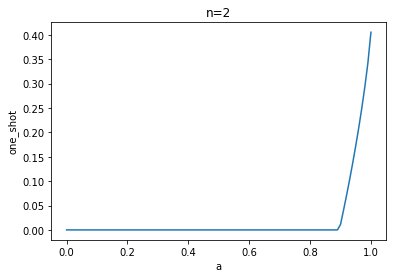

In [ ]:
from matplotlib import pyplot as plt
 
plt.plot(A, ONESHOT)
plt.title('n=2')
plt.xlabel('a')
plt.ylabel('one_shot')
plt.show()

## * n=2일 때 1/3, n=4일 때 1/5이 고정된 eigval인 것을 확인.
## * n=2일 때
- a=0.9, b=0.1일 때 coh info가 급격히 치솟음. 일정하게(3*a) 증가한다고 가정했을 때 a=0.896666에서부터 0보다 커지나?
- coh info에서 max를 찍을 때 eigval가 흥미로운 꼴을 띰(맨 아래 셀 확인)


In [ ]:
# eigval 값 출력
for n in range(2, 5):
  print("n = {}".format(n))
  for i in range(0, 101, 1):
    a = i/100
    b = 1-a
    if b < 0: continue
    for epoch in range(10):
      M = rand_dm(2).full()
      eig_phi = np.linalg.eigvalsh(phi(a, b, M, n)).real.round(5)
      print("a: {}, b: {}, eigval: {} ".format(a, b, eig_phi))
  print("--------------------------------------------------------")

n = 2
a: 0.0, b: 1.0, eigval: [0.16671 0.33333 0.49996] 
a: 0.0, b: 1.0, eigval: [0.22386 0.33333 0.4428 ] 
a: 0.0, b: 1.0, eigval: [0.2294  0.33333 0.43727] 
a: 0.0, b: 1.0, eigval: [0.29509 0.33333 0.37157] 
a: 0.0, b: 1.0, eigval: [0.32788 0.33333 0.33879] 
a: 0.0, b: 1.0, eigval: [0.21415 0.33333 0.45252] 
a: 0.0, b: 1.0, eigval: [0.22176 0.33333 0.44491] 
a: 0.0, b: 1.0, eigval: [0.20193 0.33333 0.46474] 
a: 0.0, b: 1.0, eigval: [0.26575 0.33333 0.40091] 
a: 0.0, b: 1.0, eigval: [0.25945 0.33333 0.40722] 
a: 0.01, b: 0.99, eigval: [0.25138 0.33333 0.41528] 
a: 0.01, b: 0.99, eigval: [0.21407 0.33333 0.4526 ] 
a: 0.01, b: 0.99, eigval: [0.32498 0.33333 0.34169] 
a: 0.01, b: 0.99, eigval: [0.21387 0.33333 0.4528 ] 
a: 0.01, b: 0.99, eigval: [0.17169 0.33333 0.49498] 
a: 0.01, b: 0.99, eigval: [0.18914 0.33333 0.47753] 
a: 0.01, b: 0.99, eigval: [0.27052 0.33333 0.39615] 
a: 0.01, b: 0.99, eigval: [0.29813 0.33333 0.36854] 
a: 0.01, b: 0.99, eigval: [0.22207 0.33333 0.4446 ] 
a: 0.01

In [ ]:
# coh info에서 max eig 출력
for i in range(0, 101, 1):
  a = i/100
  b = 1-a
  if b < 0: continue
  A.append(a)
  B.append(b)
  result=one_shot(a, b, 2, True)
  ONESHOT.append(result)

a: 0.0, b: 1.0, max_eig: [0.16667 0.33333 0.5    ]
a: 0.01, b: 0.99, max_eig: [0.17167 0.33333 0.495  ]
a: 0.02, b: 0.98, max_eig: [0.17667 0.33333 0.49   ]
a: 0.03, b: 0.97, max_eig: [0.18167 0.33333 0.485  ]
a: 0.04, b: 0.96, max_eig: [0.18667 0.33333 0.48   ]
a: 0.05, b: 0.95, max_eig: [0.19167 0.33333 0.475  ]
a: 0.06, b: 0.94, max_eig: [0.19667 0.33333 0.47   ]
a: 0.07, b: 0.9299999999999999, max_eig: [0.20167 0.33333 0.465  ]
a: 0.08, b: 0.92, max_eig: [0.20667 0.33333 0.46   ]
a: 0.09, b: 0.91, max_eig: [0.21167 0.33333 0.455  ]
a: 0.1, b: 0.9, max_eig: [0.21667 0.33333 0.45   ]
a: 0.11, b: 0.89, max_eig: [0.22167 0.33333 0.445  ]
a: 0.12, b: 0.88, max_eig: [0.22667 0.33333 0.44   ]
a: 0.13, b: 0.87, max_eig: [0.23167 0.33333 0.435  ]
a: 0.14, b: 0.86, max_eig: [0.23667 0.33333 0.43   ]
a: 0.15, b: 0.85, max_eig: [0.24167 0.33333 0.425  ]
a: 0.16, b: 0.84, max_eig: [0.24667 0.33333 0.42   ]
a: 0.17, b: 0.83, max_eig: [0.25167 0.33333 0.415  ]
a: 0.18, b: 0.8200000000000001, max_